<a href="https://colab.research.google.com/github/Kiranmai-sudo/MalaScan/blob/main/MalariaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!umount -l /content/drive

umount: /content/drive: no mount point specified.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os, warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [ ]:
import os
path = "/content/drive/MyDrive/dataset/gtrain"
print("Exists:", os.path.exists(path))

Exists: True


In [ ]:
import os
train_path = "/content/drive/MyDrive/data_resized/gtrain_resized"
test_path = "/content/drive/MyDrive/dataset/test"
os.listdir(train_path)

['gParasitized', 'gUninfected']

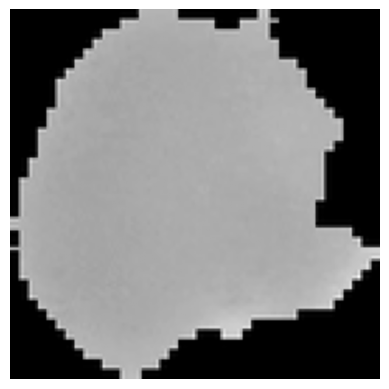

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
para_folder = os.path.join(train_path, "gParasitized")  # Path to Parasitized images

# Get the first image file from the Parasitized folder
first_image_path = os.path.join(para_folder, os.listdir(para_folder)[0])
# Read and display the image
para_cell = imread(first_image_path)
plt.imshow(para_cell,cmap="gray")
plt.axis("off")  # Hide axes for better display
plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os, warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [ ]:
# Image data generators with augmentation and validation split
image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=36,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

# Path to cleaned and resized images
data_dir = '/content/drive/MyDrive/data_resized/gtrain_resized'

# Training generator
train_gen = image_generator.flow_from_directory(
    data_dir,
    target_size=(132, 132),           # Match the model input
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation generator
val_gen = image_generator.flow_from_directory(
    data_dir,
    target_size=(132, 132),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 17638 images belonging to 2 classes.
Found 4408 images belonging to 2 classes.


In [10]:
final_img_shape = (130, 130, 3)  # Example: 130x130 RGB images

# Build CNN Model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                 activation='relu', input_shape=final_img_shape))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Regularization to prevent overfitting

# Output Layer (Binary Classification)
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 31, 31, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,177 (12.61 MB)

 Trainable params: 3,305,473 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),   # You had 0.1 before, which is too high!
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Learning rate schedule function
def time_based_decay(epoch, lr):
    initial_lr = 0.001
    k = 0.1
    return initial_lr / (1 + k * epoch)
# TensorBoard logs
log_directory = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Define callbacks
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint('malaria_cell_classifier.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
lrs = LearningRateScheduler(time_based_decay, verbose=1)
tb = TensorBoard(log_dir=log_directory, histogram_freq=1, write_graph=True, write_images=True, update_freq='epoch')


In [ ]:
model.fit(
    train_gen,
    epochs=10,
    batch_size=32,
    validation_data=val_gen,
    callbacks=[es, lrs, mc, tb]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.6123 - loss: 0.7614 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to malaria_cell_classifier.keras
552/552 ━━━━━━━━━━━━━━━━━━━━ 8833s 16s/step - accuracy: 0.6125 - loss: 0.7610 - val_accuracy: 0.5000 - val_loss: 4.5387 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009090909090909091.
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8678 - loss: 0.3268
Epoch 2: val_accuracy improved from 0.50000 to 0.50023, saving model to malaria_cell_classifier.keras
552/552 ━━━━━━━━━━━━━━━━━━━━ 106s 192ms/step - accuracy: 0.8679 - loss: 0.3268 - val_accuracy: 0.5002 - val_loss: 2.1518 - learning_rate: 9.0909e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008333333333333334.
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8984 - loss: 0.2720
Epoch 3: val_accura

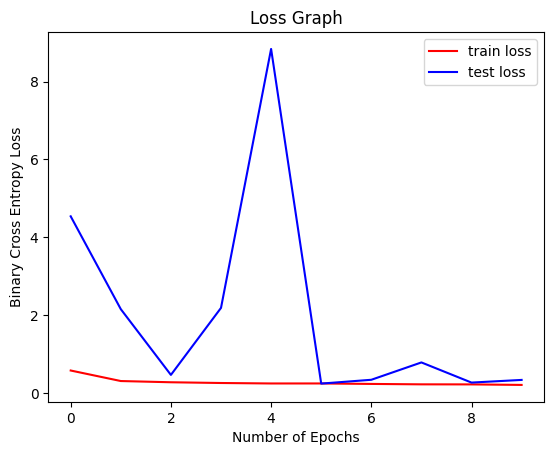

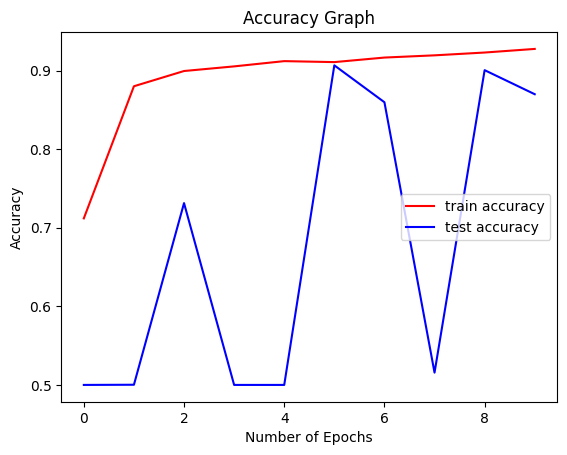

In [ ]:
# Time-based decay schedule
def time_based_decay(epoch, lr):
    decay_rate = 0.01
    if epoch > 15:
        return lr * 1 / (1 + decay_rate * epoch)
    return lr / np.sqrt(1 + decay_rate * epoch)
plt.plot(model.history.history['loss'],'r',label='train loss')
plt.plot(model.history.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Loss Graph')
plt.legend()
plt.show();
plt.plot(model.history.history['accuracy'],'r',label='train accuracy')
plt.plot(model.history.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show();

In [ ]:
loss, acc = model.evaluate(val_gen,verbose=0)
print("Test Binary Crossentropy Loss:", loss)
print("Test Accuracy:", acc)

Test Binary Crossentropy Loss: 0.23640893399715424
Test Accuracy: 0.907667875289917


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2  # for grayscale conversion

# Path to RGB test image
img_path = "/content/drive/MyDrive/dataset/test/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_181.png"

# Load the image as RGB
img_rgb = load_img(img_path, target_size=(132, 132))  # default is RGB
img_rgb = img_to_array(img_rgb)

# Convert RGB to Grayscale manually using OpenCV
img_gray = cv2.cvtColor(img_rgb.astype('uint8'), cv2.COLOR_RGB2GRAY)

# Reshape to (132, 132, 1) to match model input
img_gray = np.expand_dims(img_gray, axis=-1)

# Normalize
img_gray = img_gray / 255.0

# Add batch dimension: (1, 132, 132, 1)
img_gray = np.expand_dims(img_gray, axis=0)

# Predict
pred = model.predict(img_gray)

# Convert prediction to class
pred_class = 1 if pred[0][0] > 0.5 else 0

# Output result
if pred_class == 0:
    print("The patient is infected with malaria.")
else:
    print("The patient is not infected with malaria.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The patient is infected with malaria.


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2  # for grayscale conversion

# Path to RGB test image
img_path = "/content/drive/MyDrive/dataset/test/Uninfected/C1_thinF_IMG_20150604_104722_cell_164.png"

# Load the image as RGB
img_rgb = load_img(img_path, target_size=(132, 132))  # default is RGB
img_rgb = img_to_array(img_rgb)

# Convert RGB to Grayscale manually using OpenCV
img_gray = cv2.cvtColor(img_rgb.astype('uint8'), cv2.COLOR_RGB2GRAY)

# Reshape to (132, 132, 1) to match model input
img_gray = np.expand_dims(img_gray, axis=-1)

# Normalize
img_gray = img_gray / 255.0

# Add batch dimension: (1, 132, 132, 1)
img_gray = np.expand_dims(img_gray, axis=0)

# Predict
pred = model.predict(img_gray)

# Convert prediction to class
pred_class = 1 if pred[0][0] > 0.5 else 0

# Output result
if pred_class == 0:
    print("The patient is infected with malaria.")
else:
    print("The patient is not infected with malaria.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The patient is not infected with malaria.
